In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_50kb.tsv', sep='\t')
assembly = 'GRCh38'

In [3]:
hmm_track.head()

,chrom,start,end,KR,VC,VC_SQRT,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM3P
0,chr1,0,50000,0.012247,0.001838,0.032337,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,50000,100000,0.047586,0.010207,0.076204,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,100000,150000,0.050368,0.015204,0.093003,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,150000,200000,0.059842,0.013402,0.087317,NaN,0.486340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,200000,250000,NaN,0.000232,0.011488,NaN,0.480564,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
chip_dir = '/pollard/data/functional_genomics/encode/GM12878/ChIP-seq'

In [5]:
def get_files(filedir, ext = 'mcool'):
    files = glob.glob(filedir + '/**/*'+ext, recursive=True)
    return files

In [6]:
bedfiles = get_files(chip_dir, 'bed.gz')

In [7]:
def bedfiles_to_df(bedfiles):
    
    df = pd.DataFrame([ bedfile.split('/')[5:] + [bedfile]  for bedfile in bedfiles],
                        columns=[
                            'cell_line','assay', 'file_format', 'output_type',
                            'assembly', 'file_status', 'target', 'biosample_treatment',
                            'lab', 'replicate', 'file_name', 'file_location'])
    
    df['cell_line'] = df['cell_line'].apply(lambda a: a.replace('-', ''))
    return df

In [8]:
beds_df = bedfiles_to_df(bedfiles)

In [9]:
beds_df = beds_df[beds_df.assembly==assembly].reset_index(drop=True)

In [10]:
beds_df.head()

,cell_line,assay,file_format,output_type,assembly,file_status,target,biosample_treatment,lab,replicate,file_name,file_location
0,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ARID3A,None,"Michael Snyder, Stanford","rep5,6",ENCFF003VDB.bed.gz,/pollard/data/functional_genomics/encode/GM128...
1,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ZNF143,None,"Michael Snyder, Stanford","rep2,3",ENCFF153TQR.bed.gz,/pollard/data/functional_genomics/encode/GM128...
2,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ZNF143,None,"Michael Snyder, Stanford","rep1,2",ENCFF193POQ.bed.gz,/pollard/data/functional_genomics/encode/GM128...
3,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,RXRA,None,"Richard Myers, HAIB","rep1,2",ENCFF313BDA.bed.gz,/pollard/data/functional_genomics/encode/GM128...
4,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,TBX21,None,"Michael Snyder, Stanford","rep1,2",ENCFF971VHK.bed.gz,/pollard/data/functional_genomics/encode/GM128...


## Summary of bedfile types

In [11]:
for output_type in beds_df.output_type.unique():
    print(output_type + ": " + str(np.sum(beds_df.output_type==output_type)))

optimal idr thresholded peaks: 166
replicated peaks: 13
peaks and background as input for IDR: 44
peaks: 500
conservative idr thresholded peaks: 160
pseudoreplicated idr thresholded peaks: 4


In [12]:
beds_replicated = beds_df[beds_df.output_type == 'replicated peaks'].sort_values(by='target')
beds_replicated.head()

,cell_line,assay,file_format,output_type,assembly,file_status,target,biosample_treatment,lab,replicate,file_name,file_location
172,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,GRCh38,released,H2AFZ,None,"Bradley Bernstein, Broad","rep1,2",ENCFF512VHW.bed.gz,/pollard/data/functional_genomics/encode/GM128...
178,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,GRCh38,released,H3K27ac,None,"Bradley Bernstein, Broad","rep1,2",ENCFF367KIF.bed.gz,/pollard/data/functional_genomics/encode/GM128...
173,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,GRCh38,released,H3K27me3,None,"John Stamatoyannopoulos, UW","rep1,2",ENCFF035PQG.bed.gz,/pollard/data/functional_genomics/encode/GM128...
174,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,GRCh38,released,H3K27me3,None,"Bradley Bernstein, Broad","rep1,2",ENCFF153VOQ.bed.gz,/pollard/data/functional_genomics/encode/GM128...
170,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,GRCh38,released,H3K36me3,None,"John Stamatoyannopoulos, UW","rep1,2",ENCFF268HMO.bed.gz,/pollard/data/functional_genomics/encode/GM128...


In [13]:
beds_optimal = beds_df[beds_df.output_type == 'optimal idr thresholded peaks'].sort_values(by='target')
beds_optimal.head()

,cell_line,assay,file_format,output_type,assembly,file_status,target,biosample_treatment,lab,replicate,file_name,file_location
0,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ARID3A,None,"Michael Snyder, Stanford","rep5,6",ENCFF003VDB.bed.gz,/pollard/data/functional_genomics/encode/GM128...
31,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ARNT,None,"Michael Snyder, Stanford","rep2,3",ENCFF758RQJ.bed.gz,/pollard/data/functional_genomics/encode/GM128...
42,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ASH2L,None,"Bradley Bernstein, Broad","rep1,2",ENCFF096XRG.bed.gz,/pollard/data/functional_genomics/encode/GM128...
120,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ATF2,None,"Richard Myers, HAIB","rep1,2",ENCFF806KKM.bed.gz,/pollard/data/functional_genomics/encode/GM128...
119,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,ATF2,None,"Michael Snyder, Stanford","rep1,2",ENCFF210HTZ.bed.gz,/pollard/data/functional_genomics/encode/GM128...


In [14]:
for replicate in beds_optimal.replicate.unique():
    print(replicate + ": " + str(np.sum(beds_optimal.replicate==replicate)))

rep5,6: 1
rep2,3: 3
rep1,2: 154
rep3,4: 2
rep4,5: 2
rep1,3: 3
rep1,4: 1


In [15]:
for lab in beds_optimal.lab.unique():
    print(lab + ": " + str(np.sum(beds_optimal.lab==lab)))

Michael Snyder, Stanford: 97
Bradley Bernstein, Broad: 14
Richard Myers, HAIB: 47
John Stamatoyannopoulos, UW: 1
Peggy Farnham, USC: 2
Kevin Struhl, HMS: 5


In [16]:
beds_optimal = beds_optimal[(beds_optimal.replicate == 'rep1,2') & (beds_optimal.lab == 'Michael Snyder, Stanford')]

In [17]:
from bioframe.util import bedtools,tsv
def bedtools_intersect_basePairs(left, right, rsuffix='_', **kwargs):
    """
    >>> ixn = bedtools_intersect(bed1, bed2, wao=True), needed to delete other keys b/c they clashed
   """
    
    out = bedtools.intersect(a=left, b=right,wao=True)
    out.drop(np.arange(len(left.columns)+3, len(out.columns) -1) , axis =1, inplace=True)
    out.columns = list(left.columns) + [c+rsuffix if c in left.columns else c for c in left.columns[0:3]] + ['bpOverlap']
    return out

In [18]:
def intersect_beds(intersect_df):
    results = []
    for file_location in intersect_df.file_location:
        results.append(bedtools_intersect_basePairs(hmm_track, file_location))
        
    return results

In [19]:
intersects_replicated = intersect_beds(beds_replicated)

In [20]:
intersects_optimal = intersect_beds(beds_optimal)

In [21]:
def bp_over_state(inter_df, hmm_track, hmm_state='HMM3', chrom=None, normalize = True, n_states=None):
    
    binsize = hmm_track['end'][0]-hmm_track['start'][0]
    hmm_track = hmm_track[~hmm_track.E1.isna()]
    inter_df = inter_df[(inter_df['start']!=-1)& (inter_df['start_']!=-1) & (~inter_df['E1'].isna())]
    
    if n_states == None:
        n_states = hmm_track[hmm_state].unique()
        n_states = n_states[n_states == n_states]
        n_states.sort()

    if chrom:
        mask= mask & (inter_df['chrom']==chrom)
        hmm_track= hmm_track[hmm_track['chrom'] == chrom]
    

    total_nucleotides = inter_df['bpOverlap']
    
    
    results = []
    
    if normalize:
        for state in n_states:
            score = total_nucleotides[(inter_df[hmm_state]==state)].sum()
            hmm_state_track = hmm_track[hmm_track[hmm_state]==state]
            score = score/((hmm_state_track['end'] - hmm_state_track['start']).sum())
            results.append(score)
        
        return np.array(results)/(total_nucleotides.sum()/(hmm_track['end'] - hmm_track['start']).sum() )
    
    else:
        return np.array([total_nucleotides[(inter_df[hmm_state]==state)].sum()/(binsize*len(hmm_track[hmm_track[hmm_state]==state])) for state in n_states])

In [22]:
def get_scores(intersects, hmm_state):
    scores = []
    for intersect in intersects:
        scores.append(bp_over_state(intersect, hmm_track, hmm_state=hmm_state))
    return np.array(scores)

In [29]:
scores_replicated_HMM3P = get_scores(intersects_replicated, 'HMM3P')
scores_replicated_HMM3 = get_scores(intersects_replicated, 'HMM3')

In [24]:
scores_optimal = get_scores(intersects_optimal, 'HMM3P')

In [25]:
def score_heatmap(scores, hmm_states, names, cmap='bwr', vmin=0, vmax=2):
    
    fig = plt.figure(figsize =(len(hmm_states)*0.7, len(names)*0.7))
    ax = fig.add_subplot(111)
        
    cax = ax.matshow(scores, cmap=cmap, vmin=vmin, vmax=vmax)
    ticks = np.arange(0,scores.shape[0],1)
    ax.set_yticks(ticks)
    ax.set_yticklabels(names)

    ax.set_xticks(np.arange(0, len(hmm_states), 1))
    ax.set_xticklabels(hmm_states)

    for i in range(scores.shape[0]):
        for j in range(scores.shape[1]):
            text = ax.text(j, i, np.round(scores[i, j], 2),
                           ha="center", va="center", color="black")
    return fig

In [32]:
HMM3P = ['B', 'Mbb', 'M', 'Maa', 'A']
HMM3 = ['B', 'M', 'A']

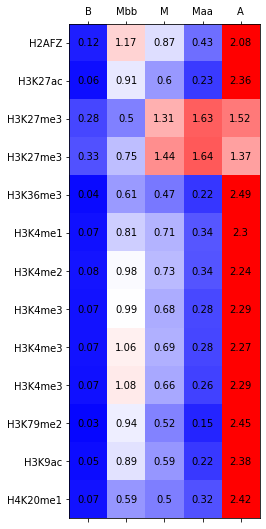

In [33]:
fig1 = score_heatmap(scores_replicated_HMM3P, HMM3P, beds_replicated.target)

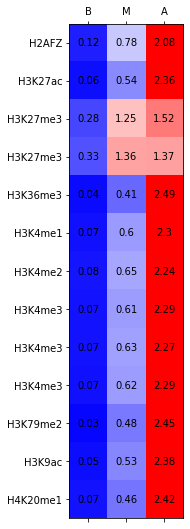

In [34]:
fig2 = score_heatmap(scores_replicated_HMM3, HMM3, beds_replicated.target)

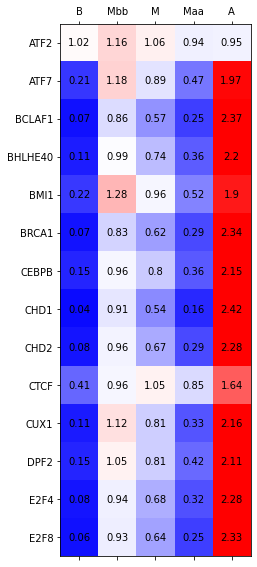

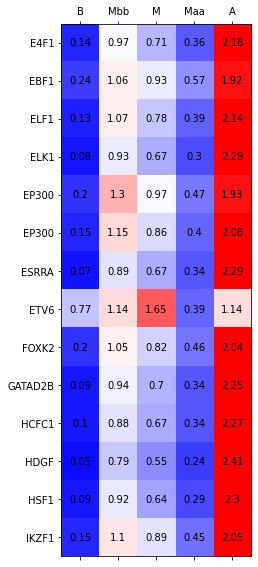

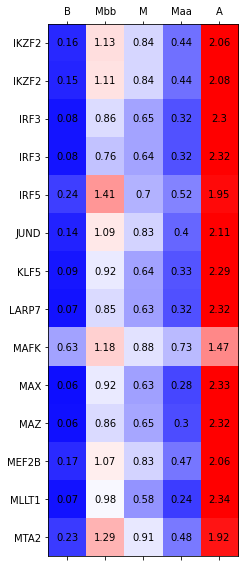

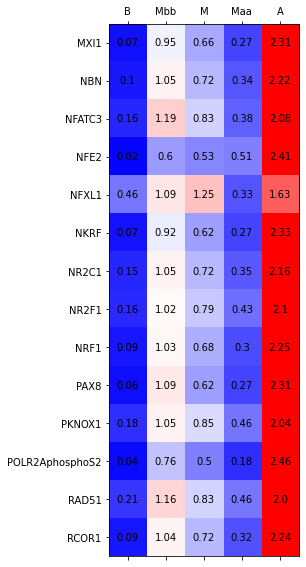

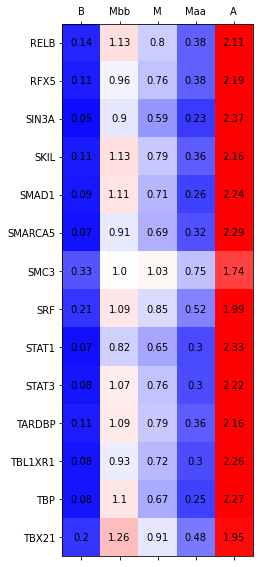

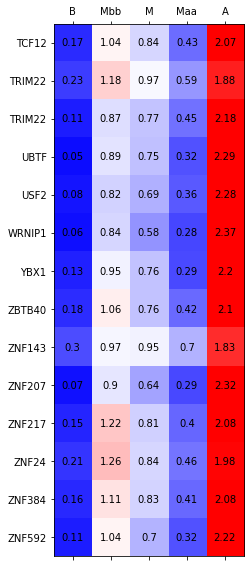

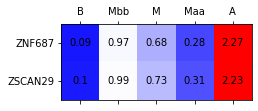

In [28]:
figs = []
winsize = 14
for i in range(scores_optimal.shape[0]//winsize +1):
    figs.append(score_heatmap(scores_optimal[i*winsize:(i+1)*winsize], hmm_states, beds_optimal.iloc[i*winsize:(i+1)*winsize].target))